This notebook contains the full process of constructing the functions to present multicycle curves on a single plot for all four methods investigated in this project.   
All data used are processed data from ```differential_analyse_Borealis.ipynb```. These data files each contains a monotonic segment of charge or discharge within a specific cycle. Specific columns see below.

In [2]:
# Import dependencies
from pathlib import Path
import re
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define standard column aliases
T = 'Test_Time(s)'
I = 'Current(A)'
Qc = 'Charge_Capacity(Ah)'
Qd = 'Discharge_Capacity(Ah)'
V = 'Voltage_sm (V)'
dqdv = 'dQ/dV (computed from preprocessed V) (Ah/V)'
dvdq = 'dV/dQ (computed from preprocessed V) (V/Ah)'

In [36]:
df = pd.read_excel(r"D:\FUSE 2025 SUM\battery-analysis-project\Data\raw_data\03-CONSTANT CURRENT protocol_Cycles 0 to 1000\Cycle 0670\CC_nineteen_Channel_5_Wb_1.xlsx")

KeyboardInterrupt: 

In [8]:
df['Cycle_Index'].unique()
# checking if I can map out the global index for each cycle, seems that I cannot here as the next folder after ```Cycle 0670``` is ```Cycle 0708``` while 0670 only contains cycle_index 1-9, so it is not complete.

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [5]:
# Set up the function to extract folder no. and the local cycle index within it, for use in legend afterwards
def extract_index(file_path):
    match = re.search(r"folder_(\d+)_cycle_(\d+)", file_path.name)
    if match:
        folder_no = int(match.group(1))
        cycle_no = int(match.group(2))
        return f"Cycle {folder_no} – c{cycle_no}"

In [18]:
# Set up output path
current_dir = Path.cwd()
output_plot_path = current_dir.parent / 'Plots' / 'multicycle'
output_plot_path.mkdir(parents=True, exist_ok=True)

# Automate the way to load files
base_path = current_dir.parent / 'Data' / 'monotonic_segments'

def read(process):
    all_files =  list(base_path.glob(f"preprocessed_*_{process}.csv"))
    
    results = []
    
    for file in all_files:
        df = pd.read_csv(file)
        label = extract_index(file)
        results.append((df, label))    
    
    return results

In [19]:
def multi_dvdq_plot(data, **kwargs):
    for df, label in data:
        plt.plot(df[V], df[dvdq], label=label, **kwargs)
    plt.xlabel("Smoothed voltage (V)")
    plt.ylabel("dV/dQ (V/Ah)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
def multi_dqdv_plot(data, **kwargs):
    for df, label in data:
        plt.plot(df[V], df[dqdv], label=label, **kwargs)
    plt.xlabel("Smoothed voltage (V)")
    plt.ylabel("dQ/dV (Ah/V)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [21]:
charge_data = read('charge')
discharge_data = read('discharge')

C:\Users\Jimei\AppData\Local\Temp\ipykernel_27024\220407900.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


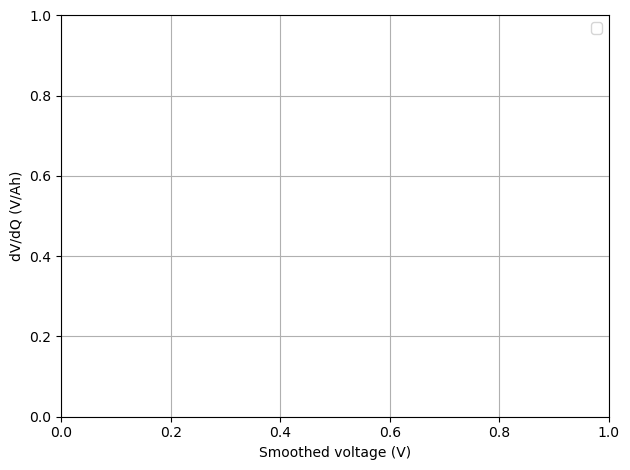

In [22]:
multi_dvdq_plot(charge_data, linestyle = 'none', marker = 'o', markersize = 2)

C:\Users\Jimei\AppData\Local\Temp\ipykernel_27024\1166630234.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


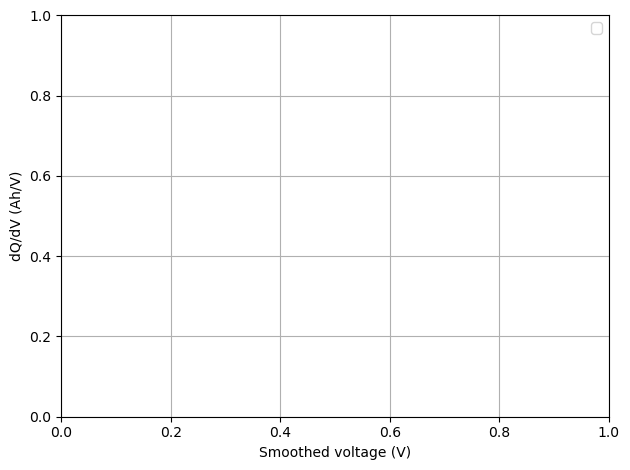

In [23]:
multi_dqdv_plot(discharge_data, linestyle = 'none', marker = 'o', markersize = 2)

In [30]:
# use written functions to generate monotonic segments for plots
current_dir = Path.cwd()
utils_path = current_dir.parent / 'Src'
sys.path.append(str(utils_path))
import utils

# Set up output directories
output_plot_path = current_dir.parent / 'Plots' / 'differential_curves'
output_data_path = current_dir.parent / 'Data' / 'monotonic_segments'
processed_data_path = current_dir.parent / 'Data' / 'processed_data'

# Create folders if they don't exist
output_plot_path.mkdir(parents=True, exist_ok=True)
output_data_path.mkdir(parents=True, exist_ok=True)
processed_data_path.mkdir(parents=True, exist_ok=True)

In [32]:
# Define base path to raw dataset
raw_path = current_dir.parent / 'Data' / 'raw_data' / '03-CONSTANT CURRENT protocol_Cycles 0 to 1000'

In [33]:
cycle_file_map = utils.build_cycle_file_map(raw_path)

In [34]:
# Global variable to store the last loaded folder's data
_last_folder = {
    'folder_no': None,
    'df': None
}

In [ ]:
utils.select_valid_cycle(
    folder_no=0,
    cycle_file_map = cycle_file_map, 
    min_seg_length=50,
    min_v_variation=10
)

In [74]:
plot_selected_vq(
    cycle_no=1,
    process='discharge',
    linestyle='none',
    marker='o',
    markersize=2
)

NameError: name 'plot_selected_vq' is not defined

In [ ]:
# Full pipeline: save region and plot all differential curves
plot_all_from_qrange(
    cycle_no=1, # the specific cycle chosen to be evaluated here within the folder
    
    # Monotonic segment range, chosen manually
    q_min=0.2,
    q_max=2.5,
    
    # str, Segment type
    process='discharge',
    
    # to filter out valid cycles in each folder
    min_seg_length=50, # int, Minimum number of points in a valid segment
    min_v_variation=10, # int, Minimum number of unique voltage values
    
    # Interpolation
    no_points=100, # int, Points to interpolate for uniform spacing
    
    # Smoothing - Savitzky-Golay filter
    window=11, # int, Window size (must be odd)
    polyorder=3, # int, Polynomial order
    
    # Gradient
    eps=1e-6, # Threshold to avoid division by near-zero
    
    # Saving and displaying
    save=False, show=True, dpi=600,
    
    # **kwargs
    linestyle='none',
    marker='o',
    markersize=2
)